In [0]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# [25 pts] A Toy Example: Decision Boundary and Conditional Independence Assumption

### Gaussian Distributed Data fits better to Gaussian Naive Bayesian rather than Logistic Regression, unfortunately that is not the case most of the time.
Now, imagine we have two artificial dataset. Both are drawn from Gaussian distribution. One of the dataset is with standard deviation 1 and the other is 5. Each cluster is conditionally independent from each other.

make_blobs function samples data points from gaussian distribution.

In [0]:
from sklearn.datasets import make_blobs
data1, label1 = make_blobs(n_samples = 500,cluster_std = 1)
data2, label2 = make_blobs(n_samples = 500,cluster_std = 5)

Let's split the datasets into train and test.

In [0]:
X_1_train,X_1_test,y_1_train,y_1_test = train_test_split(data1, label1, test_size=0.33, random_state=42)
X_2_train,X_2_test,y_2_train,y_2_test = train_test_split(data2, label2, test_size=0.33, random_state=42)

Plot the first dataset with standard deviation 1.

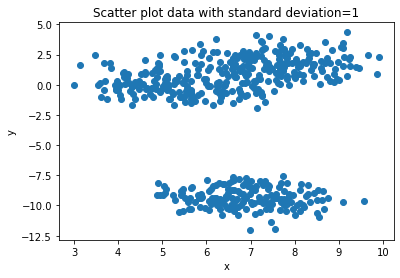

In [4]:
plt.scatter(data1[:,0], data1[:,1])
plt.title('Scatter plot data with standard deviation=1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Plot the first dataset with standard deviation 4.

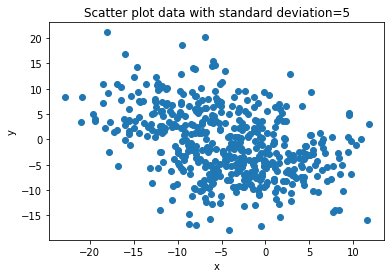

In [5]:
plt.scatter(data2[:,0], data2[:,1])
plt.title('Scatter plot data with standard deviation=5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Train a Gaussian Naive Bayesian and Logistic Regression with the 1st dataset.

In [6]:
GNB = GaussianNB()
GNB.fit(X_1_train,y_1_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
LR = LogisticRegression()
LR.fit(X_1_train,y_1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Perfect Decision Boundary

In [8]:
y_1_pred_GNB = GNB.predict(X_1_test)
print("Classification Report for Naive Bayesian:")
print(classification_report(y_1_test,y_1_pred_GNB))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.88      0.90      0.89        49
           2       0.93      0.91      0.92        68

    accuracy                           0.93       165
   macro avg       0.94      0.94      0.94       165
weighted avg       0.93      0.93      0.93       165



In [9]:
print("Confusion Matrix for Naive Bayesian:")
print(confusion_matrix(y_1_test,y_1_pred_GNB))

Confusion Matrix for Naive Bayesian:
[[48  0  0]
 [ 0 44  5]
 [ 0  6 62]]


In [10]:
y_1_pred_LR = LR.predict(X_1_test)
print("Classification Report for Logistic Regression:")
print(classification_report(y_1_test,y_1_pred_LR))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.88      0.90      0.89        49
           2       0.93      0.91      0.92        68

    accuracy                           0.93       165
   macro avg       0.94      0.94      0.94       165
weighted avg       0.93      0.93      0.93       165



In [11]:
print("Confusion Matrix for Naive Bayesian:")
print(confusion_matrix(y_1_test,y_1_pred_GNB))

Confusion Matrix for Naive Bayesian:
[[48  0  0]
 [ 0 44  5]
 [ 0  6 62]]


### Both algorithm perfectly separate two data clusters for 1st dataset with standard deviation 1. The data points are linearly separable.

In [12]:
GNB = GaussianNB()
GNB.fit(X_2_train,y_2_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [13]:
LR = LogisticRegression()
LR.fit(X_2_train,y_2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_2_pred_GNB = GNB.predict(X_2_test)
print("Classification Report for Naive Bayesian:")
print(classification_report(y_2_test,y_2_pred_GNB))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        46
           1       0.60      0.44      0.51        57
           2       0.55      0.61      0.58        62

    accuracy                           0.64       165
   macro avg       0.64      0.65      0.64       165
weighted avg       0.63      0.64      0.63       165



In [15]:
print("Confusion Matrix for Naive Bayesian:")
print(confusion_matrix(y_2_test,y_2_pred_GNB))

Confusion Matrix for Naive Bayesian:
[[42  0  4]
 [ 5 25 27]
 [ 7 17 38]]


In [16]:
y_2_pred_LR = LR.predict(X_2_test)
print("Classification Report for Logistic Regression:")
print(classification_report(y_2_test,y_2_pred_LR))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        46
           1       0.58      0.54      0.56        57
           2       0.58      0.55      0.56        62

    accuracy                           0.65       165
   macro avg       0.65      0.67      0.66       165
weighted avg       0.64      0.65      0.64       165



In [17]:
print("Confusion Matrix for Naive Bayesian:")
print(confusion_matrix(y_2_test,y_2_pred_GNB))

Confusion Matrix for Naive Bayesian:
[[42  0  4]
 [ 5 25 27]
 [ 7 17 38]]


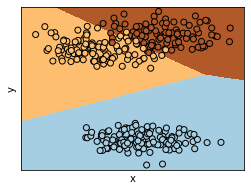

In [18]:
logreg = LogisticRegression()

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_1_train, y_1_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_1_train[:, 0].min() - .5, X_1_train[:, 0].max() + .5
y_min, y_max = X_1_train[:, 1].min() - .5, X_1_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_1_train[:, 0], X_1_train[:, 1], c=y_1_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

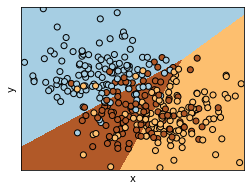

In [19]:
logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_2_train, y_2_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_2_train[:, 0].min() - .5, X_2_train[:, 0].max() + .5
y_min, y_max = X_2_train[:, 1].min() - .5, X_2_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_2_train[:, 0], X_2_train[:, 1], c=y_2_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x')
plt.ylabel('y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Use the scatter plot and draw the perfect decision boundary on two scatter plot. Discuss what is linear separability, decision boundary, which datapoints are harder to separate. Discuss the accuries and the why which model performs better.
 

### Please also read: [Equivalence of GNB and LR](https://appliedmachinelearning.blog/2019/09/30/equivalence-of-gaussian-naive-bayes-and-logistic-regression-an-explanation/)

LR is a model used for classification problems and it performs well on linearly separable classes.We are using the LR model in order to find the decision boundaries.

In Euclidean geometry, linear separability is a property of two sets of points. In this case there are 3 sets of points, respect to each class making clusters.

STD=1 contained points easier to separate.In STD=5 we have points inside the clusters of other classes which causes model to misclassify some classes.These datapoints causes the linear separability to be maintained harder.This is actually not a major problem since trying to make the accuracy much higher might cause some problems such as overfitting.We can think of those data points as outliers.

# [75pts] Logistic Regression and Naive Bayesian Comparison

### The dataset
We will use Kaggle dataset. This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost.

You can [download.](https://www.kaggle.com/rmisra/news-category-dataset)

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [0]:
df=pd.read_json("/content/drive/My Drive/ML-HW'S/HW#3/News_Category_Dataset_v2.json",lines= True)

## Select 4 categories: Politics, Wellness, Entertainment, Travel

use only 50K of data row

In [0]:
df = df.sample(50000)

In [0]:
new_df = df[(df['category']== 'POLITICS') | (df['category']== 'WELLNESS') | (df['category']== 'ENTERTAINMENT') | (df['category']== 'TRAVEL')]

In [25]:
new_df['category'].value_counts()

POLITICS         8159
WELLNESS         4406
ENTERTAINMENT    4040
TRAVEL           2534
Name: category, dtype: int64

Convert category names to digit labelling

In [0]:
y = (new_df['category'].to_numpy() == "WELLNESS")*1 + (new_df['category'].to_numpy() == "ENTERTAINMENT")*2 + (new_df['category'].to_numpy() == "TRAVEL")*3

Merge headlines with short descriptions

In [0]:
X = new_df['short_description'] + ' '+ new_df['headline']

### Create Tf-Idf model

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

CountV = CountVectorizer(lowercase=True,stop_words='english')
vectorizer = CountV.fit_transform(X)

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
X = tfidf_transformer.fit_transform(vectorizer)

Split train and test data

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

### Gaussian Naive Bayesian

In [31]:
GNB = GaussianNB()
GNB.fit(x_train.toarray(),y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [32]:
predictedByGNB = GNB.predict(x_test.toarray())
print("Classification Report for Naive Bayesian:")
print(classification_report(y_test,predictedByGNB))

Classification Report for Naive Bayesian:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      2670
           1       0.73      0.70      0.71      1440
           2       0.67      0.70      0.69      1359
           3       0.62      0.62      0.62       847

    accuracy                           0.73      6316
   macro avg       0.70      0.70      0.70      6316
weighted avg       0.73      0.73      0.73      6316



In [33]:
print("Confusion Matrix for Naive Bayesian:")
print(confusion_matrix(y_test,predictedByGNB))

Confusion Matrix for Naive Bayesian:
[[2106  170  286  108]
 [ 230 1005  101  104]
 [ 209   87  948  115]
 [ 142  110   70  525]]


### 6) Logistic Regression

In [34]:
LR = LogisticRegression()
LR.fit(x_train.toarray(),y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
predictedByLR = LR.predict(x_test.toarray())
print("Classification Report for Logistic Regression:")
print(classification_report(y_test,predictedByLR))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2670
           1       0.88      0.89      0.88      1440
           2       0.88      0.83      0.86      1359
           3       0.94      0.75      0.83       847

    accuracy                           0.89      6316
   macro avg       0.89      0.86      0.87      6316
weighted avg       0.89      0.89      0.89      6316



In [36]:
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_test,predictedByLR))

Confusion Matrix for Logistic Regression:
[[2550   60   47   13]
 [  93 1284   47   16]
 [ 161   55 1131   12]
 [  88   66   57  636]]


### Observe Logistic Regression is much slower but more accurate. Discuss.

In [37]:
print(accuracy_score(y_test,predictedByGNB))

0.7257758074730842


In [38]:
print(accuracy_score(y_test,predictedByLR))

0.886795440151995


CountVectorizer has been used in order to tokenize 4 topics of news dataset and TfidfTransformer is used in order to have the tokenized dataset in tf-idf representative format.Logistic Regression and Gaussian Naive Bayes is trained using the dataset obtained by TfidfTransformer.Logistic regression offered higher performance metrics(precision,recall,f1-score) than Naive bayes with 0.89 accuracy score but was slow in time.It can be observed that Gaussian Naive Bayes could not manage to perform well since in text analysis,words tend to show dependence between their self causing the conditional indepence assumption of Gaussian Naive Bayes unsatisfied where on the other hand ,Logistic Regression manages to deal with conditional independence (by trying to map posterior directly).